In [699]:
#credits to prof. Kumar Borugadda for deep explanation of implementation of LR in python

In [700]:
import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange
import pandas as pd
import numpy as np
from IPython.display import Image 
from sklearn.model_selection import train_test_split
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot

In [701]:
col_names = ['date','rise','Доходность ОФЗ по сроку до 1 года','Ключевая ставка','Ставка по вкладам в долларах до 1 года','StavkaVRub','Нефть марки Юралс, долл./барр','Индекс потребительских цен, ед.','М0, руб','М2, руб','Курс доллара к рублю, руб','Номинальная средняя з/п, руб']
test = pd.read_csv("/home/man/Desktop/bst_ds.csv",sep=';', header = 0, decimal=',', names=col_names, usecols=col_names)
df1 = pd.DataFrame(data=test)
df1['date'] = pd.to_datetime(df1['date'],format='%d.%m.%Y')
df1['month'] = df1['date'].dt.month
df1['year'] = df1['date'].dt.year
#df1 = df1.drop("date",axis =1)
df1.sample(4)

,date,rise,Доходность ОФЗ по сроку до 1 года,Ключевая ставка,Ставка по вкладам в долларах до 1 года,StavkaVRub,"Нефть марки Юралс, долл./барр","Индекс потребительских цен, ед.","М0, руб","М2, руб","Курс доллара к рублю, руб","Номинальная средняя з/п, руб",month,year
50,2015-03-01,186618.0,12.8,14.0,5.2,11.2,56,149.4,7815500,31029,60,32642,3,2015
28,2013-05-01,-301.0,5.8,8.3,2.5,5.7,103,120.9,7613900,27593,31,29723,5,2013
80,2017-09-01,NaN,7.6,8.5,0.7,5.3,57,168.2,9225200,39571,58,38047,9,2017
22,2012-11-01,252527.0,6.5,8.3,2.9,6.0,110,116.6,7157200,24741,31,27448,11,2012


In [702]:
df1.shape

(84, 14)

In [703]:
df1.isnull().sum()

date                                       0
rise                                      12
Доходность ОФЗ по сроку до 1 года          0
Ключевая ставка                            0
Ставка по вкладам в долларах до 1 года     0
StavkaVRub                                 0
Нефть марки Юралс, долл./барр              0
Индекс потребительских цен, ед.            0
М0, руб                                    0
М2, руб                                    0
Курс доллара к рублю, руб                  0
Номинальная средняя з/п, руб               0
month                                      0
year                                       0
dtype: int64

# 1.Separate the NULL values

Further, Separate the NULL values of rise column and consider as test data:

In [704]:
#separate NULL values from 'rise' feature:
test_data = df1[df1.rise.isnull()] # or test_data = df1[df1['rise'].isnull()]

In [705]:
test_data

,date,rise,Доходность ОФЗ по сроку до 1 года,Ключевая ставка,Ставка по вкладам в долларах до 1 года,StavkaVRub,"Нефть марки Юралс, долл./барр","Индекс потребительских цен, ед.","М0, руб","М2, руб","Курс доллара к рублю, руб","Номинальная средняя з/п, руб",month,year
72,2017-01-01,NaN,8.4,10.0,0.8,6.5,55,166.4,8628900,38017,60,34422,1,2017
73,2017-02-01,NaN,8.8,10.0,0.8,6.3,55,166.8,8711600,38475,58,35497,2,2017
74,2017-03-01,NaN,9.0,9.8,0.8,5.9,52,167.0,8697700,38555,58,37899,3,2017
75,2017-04-01,NaN,8.7,9.8,0.5,6.3,53,167.6,8936600,38664,56,39225,4,2017
76,2017-05-01,NaN,8.3,9.3,0.8,6.1,51,168.2,8907000,39223,57,39679,5,2017
77,2017-06-01,NaN,8.0,9.0,0.7,5.7,47,169.2,9066500,39623,58,41454,6,2017
78,2017-07-01,NaN,8.1,9.0,0.7,6.1,49,169.3,9174300,39276,60,38073,7,2017
79,2017-08-01,NaN,7.9,9.0,0.7,6.1,52,168.4,9194600,39419,60,37099,8,2017
80,2017-09-01,NaN,7.6,8.5,0.7,5.3,57,168.2,9225200,39571,58,38047,9,2017
81,2017-10-01,NaN,7.5,8.3,0.6,5.7,58,168.5,9246600,39566,58,38333,10,2017


# 2.Drop the NULL values from the dataframe df1 and consider it as train data

In [706]:
df1.dropna(inplace=True)

In [707]:
df1

,date,rise,Доходность ОФЗ по сроку до 1 года,Ключевая ставка,Ставка по вкладам в долларах до 1 года,StavkaVRub,"Нефть марки Юралс, долл./барр","Индекс потребительских цен, ед.","М0, руб","М2, руб","Курс доллара к рублю, руб","Номинальная средняя з/п, руб",month,year
0,2011-01-01,-79049.0,5.2,7.8,2.9,4.5,96,106.2,5532900,19308,30,20669,1,2011
1,2011-02-01,180475.0,5.1,8.0,3.1,4.4,104,107.0,5613700,19537,29,20680,2,2011
2,2011-03-01,106845.0,5.0,8.0,3.1,4.2,114,107.7,5647000,19789,28,22673,3,2011
3,2011-04-01,224890.0,4.6,8.0,2.6,4.1,123,108.1,5863400,20021,28,22519,4,2011
4,2011-05-01,45856.0,4.8,8.3,2.6,4.1,114,108.6,5893400,20161,28,22779,5,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2016-08-01,92168.0,9.3,10.5,0.9,6.8,46,163.0,8517600,36170,65,35405,8,2016
68,2016-09-01,20272.0,9.0,10.0,0.8,6.0,46,163.3,8557800,36149,65,35843,9,2016
69,2016-10-01,72037.0,9.0,10.0,0.7,6.0,50,164.0,8459500,36051,63,35749,10,2016
70,2016-11-01,172323.0,8.9,10.0,0.7,6.6,46,164.8,8425200,36433,64,36195,11,2016


train_data := rows from the data frame (df1), where column "rise" has no NULL values

In [708]:
df1.isnull().sum()

date                                      0
rise                                      0
Доходность ОФЗ по сроку до 1 года         0
Ключевая ставка                           0
Ставка по вкладам в долларах до 1 года    0
StavkaVRub                                0
Нефть марки Юралс, долл./барр             0
Индекс потребительских цен, ед.           0
М0, руб                                   0
М2, руб                                   0
Курс доллара к рублю, руб                 0
Номинальная средняя з/п, руб              0
month                                     0
year                                      0
dtype: int64

# 3.Create "X_train" and "y_train" from data frame (df1)

In [709]:
##create the "y_train"
# "y_train" means rows from the df1.rise with no NULL values
y_train = df1.rise

#Normalization
y_train = (y_train-min(y_train))/(max(y_train)-min(y_train))

In [710]:
y_train

0     0.304868
1     0.466867
2     0.420906
3     0.494592
4     0.382835
        ...   
67    0.411744
68    0.366866
69    0.399178
70    0.461778
71    0.909194
Name: rise, Length: 72, dtype: float64

In [711]:
# "X_train" means data frame (df1 )without df1.rise feature with non NULL values
#X_train = df1.drop(['date','rise','year'],axis=1) 
X_train = df1.drop(['date','rise','year','Доходность ОФЗ по сроку до 1 года','Нефть марки Юралс, долл./барр','М0, руб','М2, руб'],axis=1) 

In [712]:
X_train

,Ключевая ставка,Ставка по вкладам в долларах до 1 года,StavkaVRub,"Индекс потребительских цен, ед.","Курс доллара к рублю, руб","Номинальная средняя з/п, руб",month
0,7.8,2.9,4.5,106.2,30,20669,1
1,8.0,3.1,4.4,107.0,29,20680,2
2,8.0,3.1,4.2,107.7,28,22673,3
3,8.0,2.6,4.1,108.1,28,22519,4
4,8.3,2.6,4.1,108.6,28,22779,5
...,...,...,...,...,...,...,...
67,10.5,0.9,6.8,163.0,65,35405,8
68,10.0,0.8,6.0,163.3,65,35843,9
69,10.0,0.7,6.0,164.0,63,35749,10
70,10.0,0.7,6.6,164.8,64,36195,11


In [713]:
# Saving feature names for later use
feature_list = list(df1.columns)
# Convert to numpy array
X_train = np.array(X_train)

In [714]:
# Using Skicit-learn to split KNOWN data into training and testing sets, to research model on KNOWN data at first
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(X_train, y_train, test_size = 0.25, random_state = 42)


In [715]:
print('Training features shape:', train_features.shape)
print('Training labels shape:', train_labels.shape)
print('Testing features shape:', test_features.shape)
print('Testing features shape:', test_labels.shape)

Training features shape: (54, 7)
Training labels shape: (54,)
Testing features shape: (18, 7)
Testing features shape: (18,)


In [716]:
#ПЕРЕРАБОТАТЬ МЕТОД ОТСЧЁТА BASELINE!! СЕЙЧАС, КАК Я ПОНИМАЮ, ОН СИЛЬНО ЗАВИСИТ ОТ ВЫБОРКИ !!!!!!!!!

# The baseline predictions are the rise of deposits
baseline_preds = test_features[:, feature_list.index('rise')]
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  2.55


# 4.Build the model

Prepairing the ML model(random forests) on training the dataset and predicting the missing values in column rise

In [717]:

#gb with early stopping
from sklearn import ensemble
n_estimators = 400
#gb = GradientBoostingRegressor(n_estimators=n_estimators)
gb = ensemble.GradientBoostingRegressor(
        n_estimators=n_estimators,
        validation_fraction=0.2,
        n_iter_no_change=5,
        tol=0.0001,
        random_state=0,
    )
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)
n_scores = cross_val_score(gb, train_features, train_labels, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -0.073 (0.029)


In [718]:
# Train the model on training data
#gb = GradientBoostingRegressor()
gb.fit(train_features, train_labels)

GradientBoostingRegressor(n_estimators=400, n_iter_no_change=5, random_state=0,
                          validation_fraction=0.2)

In [719]:
# Use the GB's predict method on the test data
predictions = gb.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions - test_labels)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'rubles.')

Mean Absolute Error: 0.08 rubles.


In [720]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 77.35 %.


In [721]:
#accuracy was 75.8 before excluding correlated features, without only нефть и доллар 75,78, without all 77

# 5.Create the "X_test" from the test data

In [722]:
X_test = test_data.drop(['date','rise','year','Доходность ОФЗ по сроку до 1 года','Нефть марки Юралс, долл./барр','М0, руб','М2, руб'],axis=1) 

In [723]:
X_test

,Ключевая ставка,Ставка по вкладам в долларах до 1 года,StavkaVRub,"Индекс потребительских цен, ед.","Курс доллара к рублю, руб","Номинальная средняя з/п, руб",month
72,10.0,0.8,6.5,166.4,60,34422,1
73,10.0,0.8,6.3,166.8,58,35497,2
74,9.8,0.8,5.9,167.0,58,37899,3
75,9.8,0.5,6.3,167.6,56,39225,4
76,9.3,0.8,6.1,168.2,57,39679,5
77,9.0,0.7,5.7,169.2,58,41454,6
78,9.0,0.7,6.1,169.3,60,38073,7
79,9.0,0.7,6.1,168.4,60,37099,8
80,8.5,0.7,5.3,168.2,58,38047,9
81,8.3,0.6,5.7,168.5,58,38333,10


# 6.Applying the model on X_test and predicting the missing values

In [724]:
#Apply the trained model on "X_test"
y_pred = gb.predict(X_test)

/home/man/.local/lib/python3.9/site-packages/sklearn/base.py:434: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


In [725]:
y_pred

array([0.14256197, 0.48762035, 0.50441542, 0.5335735 , 0.48492575,
       0.49261977, 0.47664749, 0.44186088, 0.43672023, 0.45572192,
       0.47570813, 0.87217339])

# 7.Replace missing values with predicted values

In [726]:
#Unnormilize back
y_pred = y_pred*(max(df1.rise)-min(df1.rise)) + min(df1.rise)

test_data.loc[test_data.rise.isnull(), "rise"] = y_pred

/tmp/ipykernel_6425/3118416503.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.loc[test_data.rise.isnull(), "rise"] = y_pred


In [727]:
test_data

,date,rise,Доходность ОФЗ по сроку до 1 года,Ключевая ставка,Ставка по вкладам в долларах до 1 года,StavkaVRub,"Нефть марки Юралс, долл./барр","Индекс потребительских цен, ед.","М0, руб","М2, руб","Курс доллара к рублю, руб","Номинальная средняя з/п, руб",month,year
72,2017-01-01,-339063.160083,8.4,10.0,0.8,6.5,55,166.4,8628900,38017,60,34422,1,2017
73,2017-02-01,213721.750082,8.8,10.0,0.8,6.3,55,166.8,8711600,38475,58,35497,2,2017
74,2017-03-01,240627.521318,9.0,9.8,0.8,5.9,52,167.0,8697700,38555,58,37899,3,2017
75,2017-04-01,287338.886066,8.7,9.8,0.5,6.3,53,167.6,8936600,38664,56,39225,4,2017
76,2017-05-01,209404.994969,8.3,9.3,0.8,6.1,51,168.2,8907000,39223,57,39679,5,2017
77,2017-06-01,221730.835458,8.0,9.0,0.7,5.7,47,169.2,9066500,39623,58,41454,6,2017
78,2017-07-01,196143.179701,8.1,9.0,0.7,6.1,49,169.3,9174300,39276,60,38073,7,2017
79,2017-08-01,140414.898116,7.9,9.0,0.7,6.1,52,168.4,9194600,39419,60,37099,8,2017
80,2017-09-01,132179.560199,7.6,8.5,0.7,5.3,57,168.2,9225200,39571,58,38047,9,2017
81,2017-10-01,162620.341218,7.5,8.3,0.6,5.7,58,168.5,9246600,39566,58,38333,10,2017


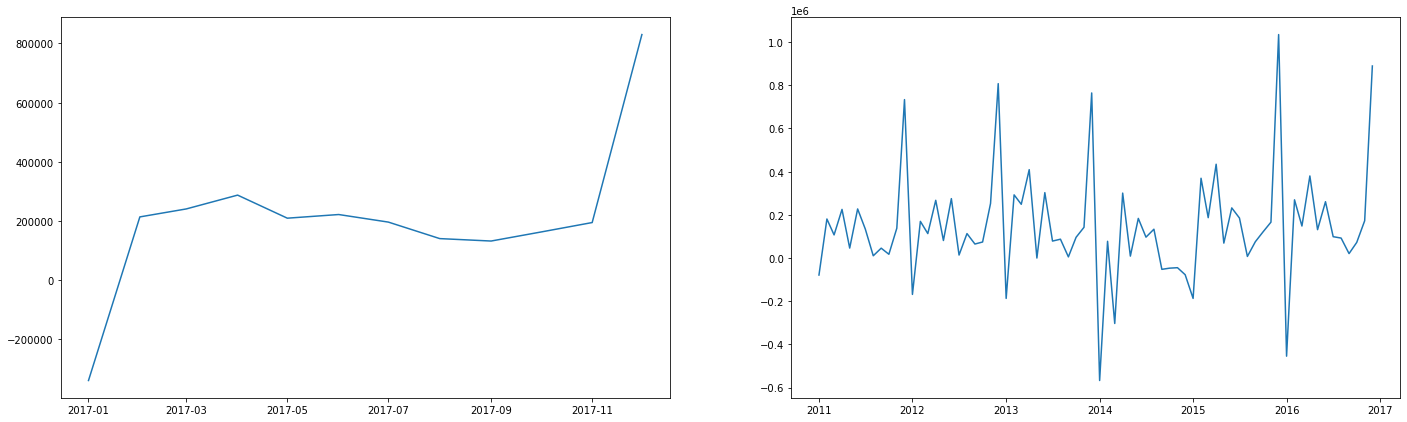

In [728]:
x1 = [i for i in test_data['date']]
y1 = [f for f in test_data['rise']]
x2 = [i for i in df1['date']]
y2 = [f for f in df1['rise']]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 7))
axes[0].plot(x1, y1)
axes[1].plot(x2, y2)